In [52]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

#model metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#
from numpy import mean
from numpy import std

#cross validation
from sklearn.model_selection import cross_val_score

# helpers
%matplotlib inline

In [2]:
#import the data
credit = pd.read_csv('CreditOneDataEDA.csv')

In [3]:
#check the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              30000 non-null  int64
 1   ID                                      30000 non-null  int64
 2   LIMIT_BAL                               30000 non-null  int64
 3   MARRIAGE                                30000 non-null  int64
 4   AGE                                     30000 non-null  int64
 5   PAY_0                                   30000 non-null  int64
 6   PAY_2                                   30000 non-null  int64
 7   PAY_3                                   30000 non-null  int64
 8   PAY_4                                   30000 non-null  int64
 9   PAY_5                                   30000 non-null  int64
 10  PAY_6                                   30000 non-null  int64
 11  BILL_AMT1      

In [4]:
#Need to get rid of the index
credit.to_csv('CreditModeling.csv', index=False)

In [5]:
#import data for machine learning and modeling
credit=pd.read_csv('CreditModeling.csv')

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              30000 non-null  int64
 1   ID                                      30000 non-null  int64
 2   LIMIT_BAL                               30000 non-null  int64
 3   MARRIAGE                                30000 non-null  int64
 4   AGE                                     30000 non-null  int64
 5   PAY_0                                   30000 non-null  int64
 6   PAY_2                                   30000 non-null  int64
 7   PAY_3                                   30000 non-null  int64
 8   PAY_4                                   30000 non-null  int64
 9   PAY_5                                   30000 non-null  int64
 10  PAY_6                                   30000 non-null  int64
 11  BILL_AMT1      

In [7]:
# check for description and information on data
credit.describe()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4799.387633,5215.502567,0.603733,0.396267,0.352833,0.163900,0.015600,0.467667,0.221200,0.778800
std,8660.398374,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,15278.305679,17777.465775,0.489129,0.489129,0.477859,0.370191,0.123924,0.498962,0.415062,0.415062
min,0.000000,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14999.500000,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22499.250000,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4031.500000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,29999.000000,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# binning the limit balance using pandas cut, discretize
cut_bins = [0, 50000, 140000, 240000, 1000000]
credit['bins_limitbal']=pd.cut(credit['LIMIT_BAL'], bins = cut_bins, labels=False)
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,bins_limitbal
0,0,1,20000,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,1,1,0,0
1,1,2,120000,2,26,-1,2,0,0,0,...,2000,1,0,0,0,0,1,1,0,1
2,2,3,90000,2,34,0,0,0,0,0,...,5000,1,0,0,0,0,1,0,1,1
3,3,4,50000,1,37,0,0,0,0,0,...,1000,1,0,0,0,0,1,0,1,0
4,4,5,50000,1,57,-1,0,-1,0,0,...,679,0,1,0,0,0,1,0,1,0


In [6]:
# slicing, selecting features/range of columns 
# planning to use discretized limit balance by quartile as the dependent variable
X = credit.iloc[:,3:29]
print('summary of feature sample')
X.head()

summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,0,0,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,1,0,0,0,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,1,0,0,0,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,1,0,0,0,1


In [7]:
# dependent variable is limit balance
y = credit['bins_limitbal']

In [8]:
# check the dependent variable
print(y)

0        0
1        1
2        1
3        0
4        0
        ..
29995    2
29996    2
29997    0
29998    1
29999    0
Name: bins_limitbal, Length: 30000, dtype: int64


In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 321)

In [29]:
# modeling with Random Forest Classifier
# limit balance discretized into quartiles as dependent
RFC1 = RandomForestClassifier()
RFC_Model1 = RFC1.fit(X_train,y_train)

In [30]:
# prediction for the model above
RFC1_preds = RFC_Model1.predict(X_test)
print(classification_report(y_test, RFC1_preds))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      2260
           1       0.57      0.54      0.56      2284
           2       0.46      0.45      0.45      2297
           3       0.59      0.51      0.55      2159

    accuracy                           0.58      9000
   macro avg       0.58      0.58      0.58      9000
weighted avg       0.58      0.58      0.58      9000



In [31]:
# modeling with Gradient Boosting Classifier
# limit balance discretized into quartiles as dependent
GBC1 = GradientBoostingClassifier()
GBC_Model1 = GBC1.fit(X_train,y_train)
#prediction for the model
GBC1_preds = GBC_Model1.predict(X_test)
print(classification_report(y_test, GBC1_preds))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      2260
           1       0.59      0.53      0.56      2284
           2       0.47      0.49      0.48      2297
           3       0.62      0.51      0.56      2159

    accuracy                           0.59      9000
   macro avg       0.59      0.59      0.59      9000
weighted avg       0.59      0.59      0.59      9000



In [13]:
# modeling with Decision Tree Classifier
# limit balance discretized into quartiles as dependent
DTC1 = DecisionTreeClassifier(max_depth=5)
DTC_Model1 = DTC1.fit(X_train,y_train)
#prediction for the model
DTC1_preds = DTC_Model1.predict(X_test)
print(classification_report(y_test, DTC1_preds))

              precision    recall  f1-score   support

           0       0.64      0.79      0.70      2260
           1       0.53      0.52      0.52      2284
           2       0.42      0.40      0.41      2297
           3       0.58      0.49      0.53      2159

    accuracy                           0.55      9000
   macro avg       0.54      0.55      0.54      9000
weighted avg       0.54      0.55      0.54      9000



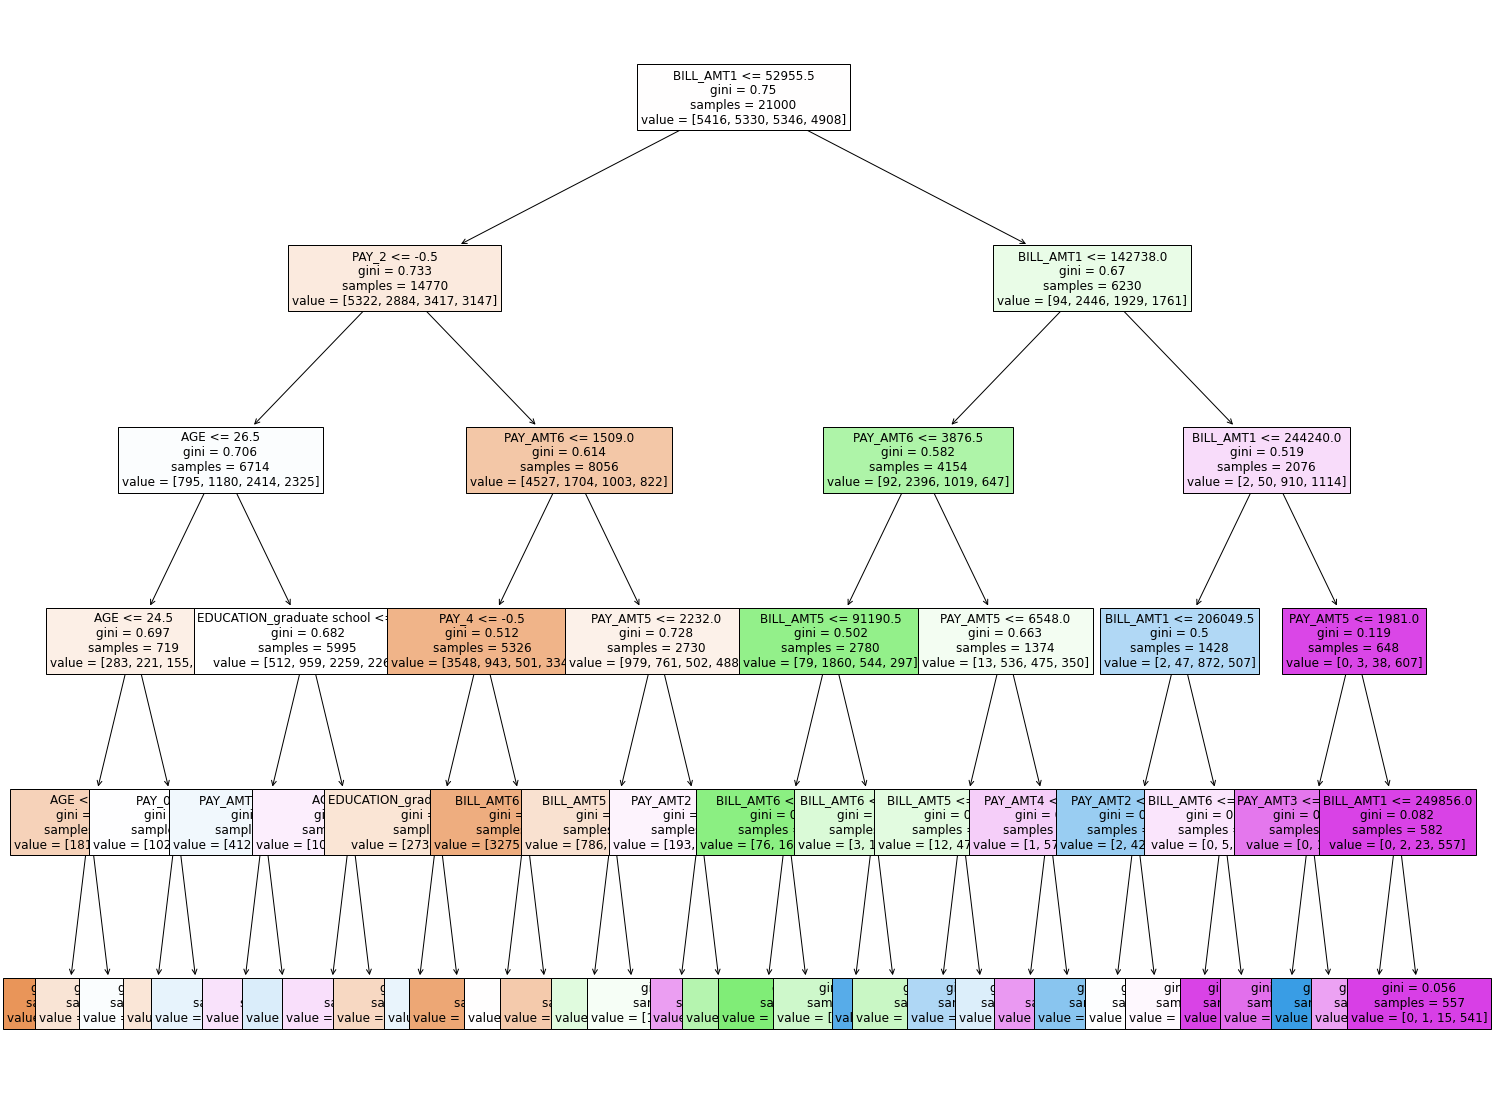

In [14]:
# visualize decision tree
# not really a helpful model
fig = plt.figure(figsize=(25, 20))
tree = plot_tree(DTC_Model1, feature_names = X.columns,
                 filled=True, fontsize=12)

In [33]:
# modeling with KNeighbors Classifier
# limit balance discretized into quartiles as dependent
KNC1 = KNeighborsClassifier()
KNC_Model1 = KNC1.fit(X_train,y_train)
#prediction for the model
KNC1_preds = KNC_Model1.predict(X_test)
print(classification_report(y_test, KNC1_preds))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68      2260
           1       0.48      0.51      0.49      2284
           2       0.42      0.40      0.41      2297
           3       0.53      0.37      0.44      2159

    accuracy                           0.51      9000
   macro avg       0.51      0.51      0.51      9000
weighted avg       0.51      0.51      0.51      9000



In [34]:
# prepping classification algorithms
# compare these 4 classification algorithms
# this creates a copy and stores in the empty list
algosClass = []
algosClass.append(('Random Forest Classifier', RandomForestClassifier()))
algosClass.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algosClass.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algosClass.append(('KNeighbors Classifier', KNeighborsClassifier()))

In [35]:
# classification scoring comparison, limit balance in quartiles
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
        names.append(name)
        results.append(result)

In [36]:
# cross validation scores, limit balance in quartiles 
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5824333333333334
Gradient Boosting Classifier 0.5893666666666667
Decision Tree Classifier 0.4853666666666667
KNeighbors Classifier 0.5242


In [37]:
# classification scoring comparison, limit balance in quartiles
# 5 folds
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=5, scoring='accuracy')
        names.append(name)
        results.append(result)
# cross validation scores, limit balance in quartiles 
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5846
Gradient Boosting Classifier 0.5891
Decision Tree Classifier 0.4877666666666666
KNeighbors Classifier 0.5275333333333333


# DISCRETIZE LIMIT BALANCE, 10 BINS

In [20]:
#drop some unneeded columns
credit = credit.drop(columns = ['bins_limitbal'])

In [21]:
credit.tail()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,cut_limitbal2
29995,29995,29996,220000,1,39,0,0,0,0,0,...,1000,0,1,0,1,0,0,0,1,1
29996,29996,29997,150000,2,43,-1,-1,-1,-1,0,...,0,0,1,0,1,0,0,0,1,1
29997,29997,29998,30000,2,37,4,3,2,-1,0,...,3100,0,1,0,0,0,1,1,0,0
29998,29998,29999,80000,1,41,1,-1,0,0,0,...,1804,0,1,0,1,0,0,1,0,0
29999,29999,30000,50000,1,46,0,0,0,0,0,...,1000,0,1,0,0,0,1,1,0,0


In [9]:
# binning the limit balance using pandas cut, discretize for smaller amounts
cut_bins2 = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
credit['cut_limitbal2']=pd.cut(credit['LIMIT_BAL'], bins=cut_bins2, labels=False)
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,cut_limitbal2
0,0,1,20000,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,1,1,0,0
1,1,2,120000,2,26,-1,2,0,0,0,...,2000,1,0,0,0,0,1,1,0,1
2,2,3,90000,2,34,0,0,0,0,0,...,5000,1,0,0,0,0,1,0,1,0
3,3,4,50000,1,37,0,0,0,0,0,...,1000,1,0,0,0,0,1,0,1,0
4,4,5,50000,1,57,-1,0,-1,0,0,...,679,0,1,0,0,0,1,0,1,0


In [10]:
#check it
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              30000 non-null  int64
 1   ID                                      30000 non-null  int64
 2   LIMIT_BAL                               30000 non-null  int64
 3   MARRIAGE                                30000 non-null  int64
 4   AGE                                     30000 non-null  int64
 5   PAY_0                                   30000 non-null  int64
 6   PAY_2                                   30000 non-null  int64
 7   PAY_3                                   30000 non-null  int64
 8   PAY_4                                   30000 non-null  int64
 9   PAY_5                                   30000 non-null  int64
 10  PAY_6                                   30000 non-null  int64
 11  BILL_AMT1      

In [11]:
#drop some unneed column
credit = credit.drop(columns = ['default payment next month_not default'])

In [12]:
# check it
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Unnamed: 0                          30000 non-null  int64
 1   ID                                  30000 non-null  int64
 2   LIMIT_BAL                           30000 non-null  int64
 3   MARRIAGE                            30000 non-null  int64
 4   AGE                                 30000 non-null  int64
 5   PAY_0                               30000 non-null  int64
 6   PAY_2                               30000 non-null  int64
 7   PAY_3                               30000 non-null  int64
 8   PAY_4                               30000 non-null  int64
 9   PAY_5                               30000 non-null  int64
 10  PAY_6                               30000 non-null  int64
 11  BILL_AMT1                           30000 non-null  int64
 12  BILL

In [13]:
# slicing, selecting features/range of columns 
# planning to use discretized limit balance by 100,000s as the dependent variable
X = credit.iloc[:,3:29]
print('summary of feature sample')
X.head()

summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,0,0,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,1,0,0,0,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,1,0,0,0,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,1,0,0,0,1


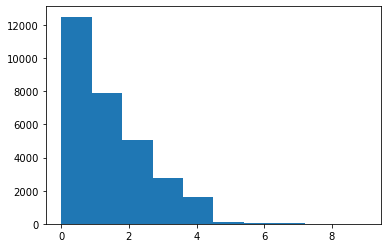

In [14]:
# histogram of new feature to see distribution
plt.hist(credit['cut_limitbal2'])
plt.show()

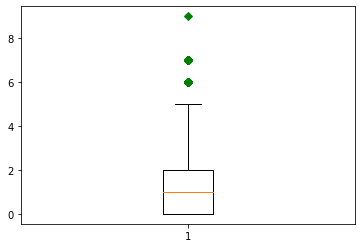

In [15]:
# looking at outliers using a box plot
# small number of outliers above 500,000 limit balance/1st 5 buckets
A = credit['cut_limitbal2']
plt.boxplot(A,0,'gD')
plt.show()

In [16]:
#changing the discretized buckets
# binning the limit balance using pandas cut, discretize for smaller amounts
cut_bins3 = [0, 100000, 200000, 300000, 400000, 500000, 1000000]
credit['cut_limitbal3']=pd.cut(credit['LIMIT_BAL'], bins=cut_bins3, labels=False)
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,cut_limitbal2,cut_limitbal3
0,0,1,20000,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,1,1,0,0
1,1,2,120000,2,26,-1,2,0,0,0,...,2000,1,0,0,0,0,1,1,1,1
2,2,3,90000,2,34,0,0,0,0,0,...,5000,1,0,0,0,0,1,0,0,0
3,3,4,50000,1,37,0,0,0,0,0,...,1000,1,0,0,0,0,1,0,0,0
4,4,5,50000,1,57,-1,0,-1,0,0,...,679,0,1,0,0,0,1,0,0,0


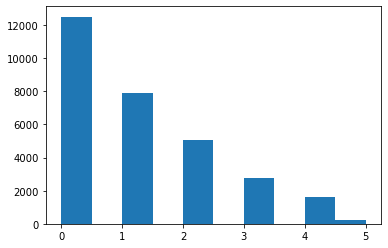

In [17]:
# histogram of new feature to see distribution
plt.hist(credit['cut_limitbal3'])
plt.show()

In [18]:
#drop an unneed column
credit = credit.drop(columns = ['cut_limitbal2'])

In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Unnamed: 0                          30000 non-null  int64
 1   ID                                  30000 non-null  int64
 2   LIMIT_BAL                           30000 non-null  int64
 3   MARRIAGE                            30000 non-null  int64
 4   AGE                                 30000 non-null  int64
 5   PAY_0                               30000 non-null  int64
 6   PAY_2                               30000 non-null  int64
 7   PAY_3                               30000 non-null  int64
 8   PAY_4                               30000 non-null  int64
 9   PAY_5                               30000 non-null  int64
 10  PAY_6                               30000 non-null  int64
 11  BILL_AMT1                           30000 non-null  int64
 12  BILL

In [20]:
# slicing, selecting features/range of columns 
# discretized limit balance as the dependent variable
X = credit.iloc[:,3:29]
print('summary of feature sample')
X.head()

summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,0,0,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,1,0,0,0,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,1,0,0,0,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,1,0,0,0,1


In [21]:
# dependent variable is limit balance in bins
y = credit['cut_limitbal3']

In [22]:
# check it
print(y)

0        0
1        1
2        0
3        0
4        0
        ..
29995    2
29996    1
29997    0
29998    0
29999    0
Name: cut_limitbal3, Length: 30000, dtype: int64


# Train, Test, Split for discretized limit balance

In [25]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 321)

In [26]:
# modeling with Gradient Boosting Classifier
# limit balance discretized as dependent
GBC2 = GradientBoostingClassifier()
GBC_Model2 = GBC2.fit(X_train,y_train)
#prediction for the model
GBC2_preds = GBC_Model2.predict(X_test)
print(classification_report(y_test, GBC2_preds))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      3710
           1       0.46      0.56      0.50      2372
           2       0.38      0.28      0.32      1511
           3       0.36      0.12      0.18       877
           4       0.40      0.16      0.23       470
           5       0.15      0.07      0.09        60

    accuracy                           0.58      9000
   macro avg       0.41      0.34      0.35      9000
weighted avg       0.54      0.58      0.54      9000



In [27]:
# modeling with Random Forest Classifier
# limit balance discretized as dependent
RFC2 = RandomForestClassifier()
RFC_Model2 = RFC2.fit(X_train,y_train)
#prediction for the model
RFC2_preds = RFC_Model2.predict(X_test)
print(classification_report(y_test, RFC2_preds))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79      3710
           1       0.46      0.53      0.50      2372
           2       0.36      0.29      0.32      1511
           3       0.38      0.16      0.22       877
           4       0.37      0.13      0.19       470
           5       0.33      0.03      0.06        60

    accuracy                           0.57      9000
   macro avg       0.44      0.34      0.35      9000
weighted avg       0.54      0.57      0.54      9000



In [28]:
# modeling with Decision Tree Classifier
# limit balance discretized as dependent
DTC2 = DecisionTreeClassifier(max_depth=5)
DTC_Model2 = DTC2.fit(X_train,y_train)
#prediction for the model
DTC2_preds = DTC_Model2.predict(X_test)
print(classification_report(y_test, DTC2_preds))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      3710
           1       0.46      0.45      0.46      2372
           2       0.33      0.40      0.36      1511
           3       0.51      0.07      0.13       877
           4       0.54      0.07      0.12       470
           5       0.50      0.02      0.03        60

    accuracy                           0.55      9000
   macro avg       0.51      0.31      0.31      9000
weighted avg       0.54      0.55      0.52      9000



In [30]:
# modeling with KNeighbors Classifier
# limit balance discretized as dependent
KNC2 = KNeighborsClassifier()
KNC_Model2 = KNC2.fit(X_train,y_train)
#prediction for the model
KNC2_preds = KNC_Model2.predict(X_test)
print(classification_report(y_test, KNC2_preds))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      3710
           1       0.44      0.48      0.46      2372
           2       0.33      0.24      0.28      1511
           3       0.28      0.12      0.17       877
           4       0.28      0.11      0.16       470
           5       0.00      0.00      0.00        60

    accuracy                           0.53      9000
   macro avg       0.33      0.30      0.30      9000
weighted avg       0.48      0.53      0.49      9000



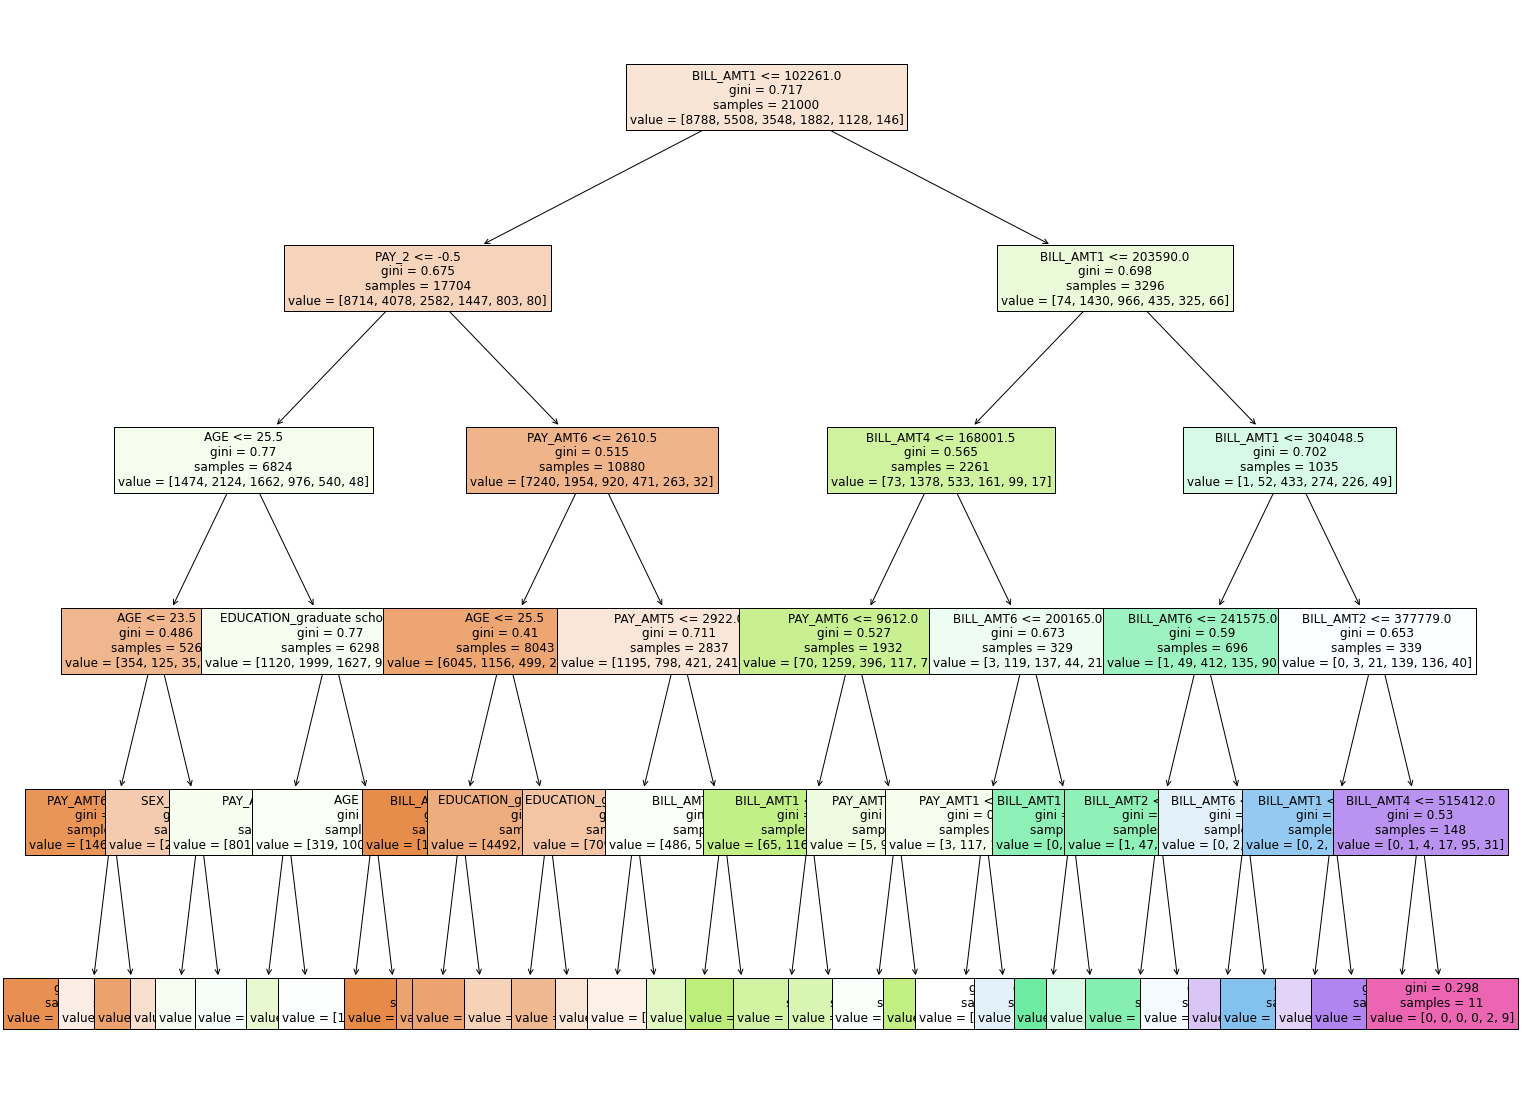

In [29]:
# visualize decision tree
fig = plt.figure(figsize=(25, 20))
tree = plot_tree(DTC_Model2, feature_names = X.columns,
                 filled=True, fontsize=12)

In [31]:
# prepping classification algorithms
# compare these 4 classification algorithms
# this creates a copy and stores in the empty list
algosClass = []
algosClass.append(('Random Forest Classifier', RandomForestClassifier()))
algosClass.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algosClass.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algosClass.append(('KNeighbors Classifier', KNeighborsClassifier()))

In [32]:
# classification scoring comparison, limit balance discretized, 3 folds
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
        names.append(name)
        results.append(result)

In [33]:
# cross validation scores, limit balance discretized
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5734333333333334
Gradient Boosting Classifier 0.576
Decision Tree Classifier 0.4749666666666667
KNeighbors Classifier 0.5292666666666667


In [34]:
# classification scoring comparison, limit balance discretized
# 5 folds
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=5, scoring='accuracy')
        names.append(name)
        results.append(result)
# cross validation scores, limit balance discretized
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5732
Gradient Boosting Classifier 0.5787333333333333
Decision Tree Classifier 0.47169999999999995
KNeighbors Classifier 0.5293666666666665


In [ ]:
# Train/test split
# change test size, repeat above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 321)

In [35]:
# modeling with Gradient Boosting Classifier
# limit balance discretized as dependent
GBC3 = GradientBoostingClassifier()
GBC_Model3 = GBC3.fit(X_train,y_train)
#prediction for the model
GBC3_preds = GBC_Model3.predict(X_test)
print(classification_report(y_test, GBC3_preds))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      3710
           1       0.46      0.56      0.50      2372
           2       0.38      0.28      0.32      1511
           3       0.36      0.12      0.18       877
           4       0.40      0.16      0.23       470
           5       0.16      0.07      0.09        60

    accuracy                           0.58      9000
   macro avg       0.41      0.34      0.35      9000
weighted avg       0.54      0.58      0.54      9000



In [36]:
# modeling with Random Forest Classifier
# limit balance discretized as dependent
RFC3 = RandomForestClassifier()
RFC_Model3 = RFC3.fit(X_train,y_train)
#prediction for the model
RFC3_preds = RFC_Model3.predict(X_test)
print(classification_report(y_test, RFC3_preds))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      3710
           1       0.46      0.53      0.49      2372
           2       0.36      0.28      0.32      1511
           3       0.35      0.15      0.21       877
           4       0.40      0.15      0.22       470
           5       0.40      0.03      0.06        60

    accuracy                           0.57      9000
   macro avg       0.45      0.34      0.35      9000
weighted avg       0.54      0.57      0.54      9000



In [38]:
# modeling with Decision Tree Classifier
# limit balance discretized as dependent
DTC3 = DecisionTreeClassifier()
DTC_Model3 = DTC3.fit(X_train,y_train)
#prediction for the model
DTC3_preds = DTC_Model3.predict(X_test)
print(classification_report(y_test, DTC3_preds))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      3710
           1       0.40      0.41      0.41      2372
           2       0.29      0.30      0.30      1511
           3       0.22      0.20      0.21       877
           4       0.19      0.19      0.19       470
           5       0.06      0.07      0.06        60

    accuracy                           0.48      9000
   macro avg       0.31      0.31      0.31      9000
weighted avg       0.48      0.48      0.48      9000



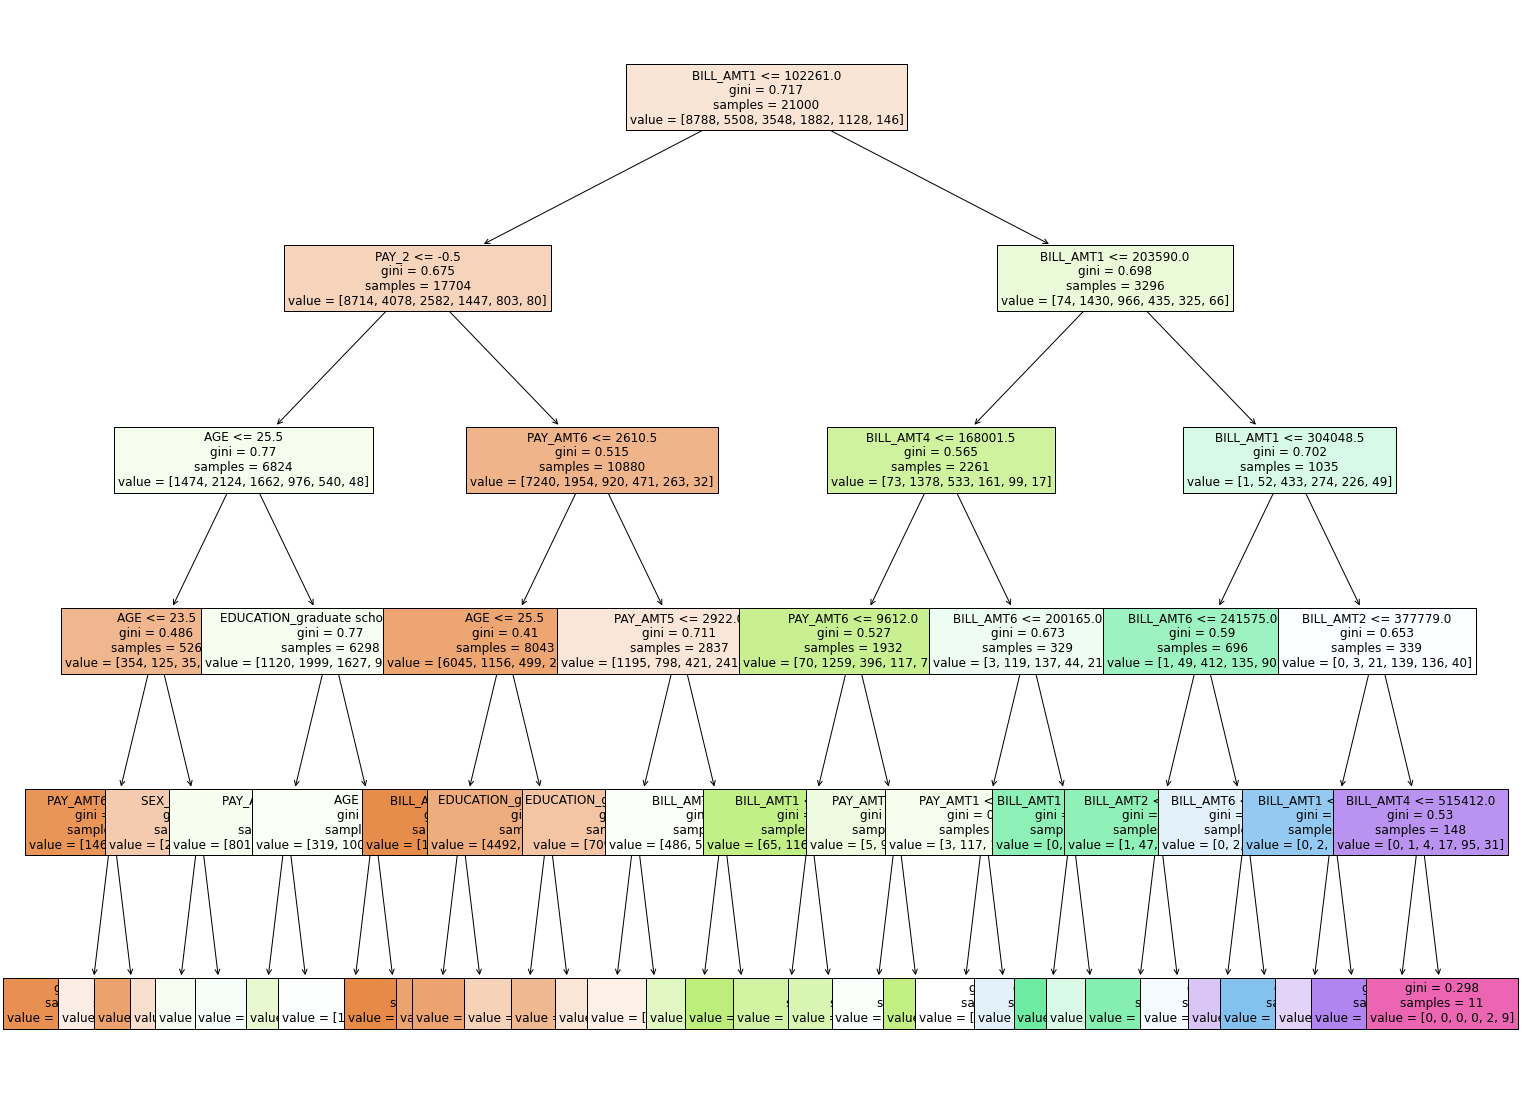

In [39]:
# visualize decision tree
fig = plt.figure(figsize=(25, 20))
tree = plot_tree(DTC_Model2, feature_names = X.columns,
                 filled=True, fontsize=12)

In [40]:
# modeling with KNeighbors Classifier
# limit balance discretized as dependent
KNC3 = KNeighborsClassifier()
KNC_Model3 = KNC3.fit(X_train,y_train)
#prediction for the model
KNC3_preds = KNC_Model3.predict(X_test)
print(classification_report(y_test, KNC3_preds))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      3710
           1       0.44      0.48      0.46      2372
           2       0.33      0.24      0.28      1511
           3       0.28      0.12      0.17       877
           4       0.28      0.11      0.16       470
           5       0.00      0.00      0.00        60

    accuracy                           0.53      9000
   macro avg       0.33      0.30      0.30      9000
weighted avg       0.48      0.53      0.49      9000



In [41]:
# classification scoring comparison, limit balance discretized
# 5 folds
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=5, scoring='accuracy')
        names.append(name)
        results.append(result)
# cross validation scores, limit balance discretized 
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5732
Gradient Boosting Classifier 0.5786666666666667
Decision Tree Classifier 0.47173333333333334
KNeighbors Classifier 0.5293666666666665


In [ ]:
#try default as dependent variable, classification because it is binary 

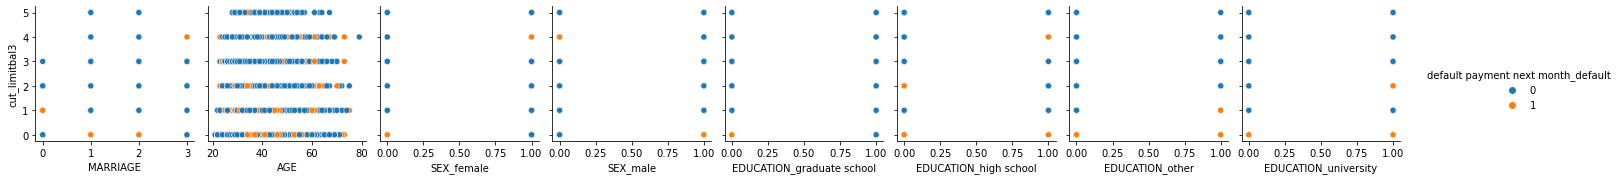

In [43]:
#pairplot 
sns.pairplot(credit,
    x_vars=["MARRIAGE", "AGE", "SEX_female", "SEX_male", "EDUCATION_graduate school", "EDUCATION_high school", "EDUCATION_other", "EDUCATION_university"],
    y_vars=["cut_limitbal3"], 
            hue="default payment next month_default")

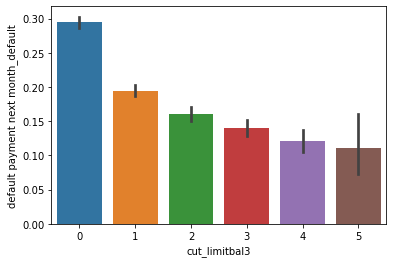

In [48]:
# bar chart of discretized limit balance
ax = sns.barplot(x="cut_limitbal3", y="default payment next month_default", data=credit)

In [50]:
#try to find and remove outliers
q = credit["LIMIT_BAL"].quantile(0.99)
credit[credit["LIMIT_BAL"] < q]
print()

In [51]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Unnamed: 0                          30000 non-null  int64
 1   ID                                  30000 non-null  int64
 2   LIMIT_BAL                           30000 non-null  int64
 3   MARRIAGE                            30000 non-null  int64
 4   AGE                                 30000 non-null  int64
 5   PAY_0                               30000 non-null  int64
 6   PAY_2                               30000 non-null  int64
 7   PAY_3                               30000 non-null  int64
 8   PAY_4                               30000 non-null  int64
 9   PAY_5                               30000 non-null  int64
 10  PAY_6                               30000 non-null  int64
 11  BILL_AMT1                           30000 non-null  int64
 12  BILL

In [53]:
# identify outliers with standard deviation
# calculate summary statistics
data = credit["LIMIT_BAL"]
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 130
